In [1]:
from os import walk
import pandas as pd

mypath ='C:/Users/Liza/Macquarie/mp_privacy_policies' 
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)

In [4]:
!pip install langdetect

     |████████████████████████████████| 981 kB 4.7 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=066107526eb65a1833239cd35fe2c956f3e508fe89c87ddd7095d36631b160c2
  Stored in directory: /Users/hinaqayyum/Library/Caches/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [5]:
from langdetect import detect

In [12]:
import re
import codecs
import pandas as pd
from langdetect import detect
to_trans = []
dates = pd.DataFrame(columns = ['website','date','lang'])
errors = pd.DataFrame(columns = ['website'])
log = open('pp_downloading.log', 'w')
for n in f:
    with codecs.open(mypath + '/'+n,'r', encoding='utf-8') as file:  
        filedata = file.read()
    filedata = " ".join(filedata.split())   
   
    with open(mypath + '/'+n,'w', encoding='utf-8') as file:
        file.write(filedata)
    matches = re.findall(r'(\d+/\d+/\d+)',filedata)
    if len(matches) == 0 or len(matches)>1:
        matches = 'Not provided'
    else:  matches = matches[0]
    try:
        l = detect(filedata)
    except:
        l = 'unknown'
    if(l != 'en'): to_trans += [n]
    dates = dates.append({'website':n[:-14],'date':matches,'lang':l}, ignore_index = True)
    print(matches)

In [10]:
dates.to_excel('mp_privacy_policies.xlsx')

In [13]:
dates

,website,date,lang


In [ ]:
!pip install googletrans==3.1.0a0

In [85]:
from googletrans import Translator
translator = Translator()

In [87]:
len(to_trans)

31

In [205]:
for n in range(0,len(to_trans)):
    print(n)
    n = to_trans[n]
    with codecs.open(mypath + '/'+n,'r', encoding='utf-8') as file:  
        filedata = file.read()
    try:
        translated_text = translator.translate(filedata)
    except IndexError as error:
        print('\nSection: Function to Create Instances of WebDriver\nCulprit: random.choice(ua_strings)\nIndexError: {}\n'.format(error))
    translated_text = translator.translate(filedata)
    filedata =translated_text.text   
    with open(mypath + '/'+n,'w', encoding='utf-8') as file:
        file.write(filedata)

In [ ]:
# looking for last updates

for n in f:
    with codecs.open(mypath + '/'+n,'r', encoding='utf-8') as file:  
        filedata = file.read().lower()
        if 'last update' in filedata:
            print(n)
            print(filedata.split("last update",1)[1][:35],'\n\n\n\n\n\n\n')

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [codecs.open(mypath + '/'+n,'r', encoding='utf-8').read() for n in f]
tfidf = TfidfVectorizer().fit_transform(documents)
pairwise_similarity = tfidf * tfidf.T

In [106]:
pairwise_similarity.toarray()  

array([[1.        , 0.36599912, 0.32247191, ..., 0.3688016 , 0.37459276,
        0.34896236],
       [0.36599912, 1.        , 0.60488996, ..., 0.70077228, 0.67226767,
        0.62553347],
       [0.32247191, 0.60488996, 1.        , ..., 0.67012484, 0.69909371,
        0.65063065],
       ...,
       [0.3688016 , 0.70077228, 0.67012484, ..., 1.        , 0.83332562,
        0.77681165],
       [0.37459276, 0.67226767, 0.69909371, ..., 0.83332562, 1.        ,
        0.93629772],
       [0.34896236, 0.62553347, 0.65063065, ..., 0.77681165, 0.93629772,
        1.        ]])

In [107]:
import pandas as pd
    

In [108]:
names = [a[:-14] for a in f]

In [109]:
pp =pd.DataFrame.sparse.from_spmatrix(pairwise_similarity, columns = names)

In [110]:
pp = pp.reset_index()

C:\Users\Liza\AppData\Local\Temp/ipykernel_2248/1650114715.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pp = pp.reset_index()


In [111]:
pp['index'] = pp['index'].apply(lambda x: f[x][:-14])

In [112]:
pp.set_index('index', inplace=True)

In [113]:
pp

,105games.com,absolutist.com,addictinggames.com,aelgame.com,al3aby4yy.com,apkpure.com,ar.gamepost.com,ar.joy.land,ar.y8.com,arcade.lemonde.fr,...,www.zapak.com,www.zebest-3000.com,www.zigiz.com,www.zoxygames.com,www.zylom.com,www.zynga.com,yaksgames.com,yourgames.io,zh.pog.com,zh.y8.com
index,,,,,,,,,,,,,,,,,,,,,
105games.com,1.000000,0.365999,0.322472,0.330262,0.054027,0.308355,0.364878,0.376160,0.325193,0.382128,...,0.383327,0.161004,0.336304,0.262582,0.348926,0.030802,0.320454,0.368802,0.374593,0.348962
absolutist.com,0.365999,1.000000,0.604890,0.583977,0.085311,0.572036,0.653292,0.680984,0.582718,0.702614,...,0.695531,0.282566,0.595566,0.452510,0.692804,0.055821,0.591805,0.700772,0.672268,0.625533
addictinggames.com,0.322472,0.604890,1.000000,0.597590,0.078665,0.525700,0.678816,0.700312,0.606065,0.722207,...,0.687944,0.326515,0.597926,0.534474,0.664313,0.062713,0.542092,0.670125,0.699094,0.650631
aelgame.com,0.330262,0.583977,0.597590,1.000000,0.078791,0.520054,0.691488,0.647065,0.616905,0.683877,...,0.663546,0.284795,0.610601,0.505072,0.640233,0.059056,0.564165,0.654626,0.711642,0.662042
al3aby4yy.com,0.054027,0.085311,0.078665,0.078791,1.000000,0.072019,0.088341,0.091111,0.079809,0.094339,...,0.085766,0.039445,0.081563,0.073229,0.084387,0.007483,0.069726,0.082476,0.088626,0.082651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
www.zynga.com,0.030802,0.055821,0.062713,0.059056,0.007483,0.046605,0.057944,0.058103,0.054714,0.061087,...,0.057574,0.058428,0.059672,0.054299,0.061397,1.000000,0.059935,0.054219,0.059704,0.056659
yaksgames.com,0.320454,0.591805,0.542092,0.564165,0.069726,0.456874,0.584880,0.563798,0.521253,0.586703,...,0.578569,0.271282,0.502820,0.396551,0.577665,0.059935,1.000000,0.579109,0.602609,0.559610
yourgames.io,0.368802,0.700772,0.670125,0.654626,0.082476,0.660073,0.810008,0.794482,0.723816,0.857939,...,0.816921,0.302875,0.709495,0.509749,0.792871,0.054219,0.579109,1.000000,0.833326,0.776812


In [114]:
pp.to_excel('similarities.xlsx')
simil_df = pd.DataFrame(columns = ['web1','web2','sim'])


In [116]:
arr = pairwise_similarity.toarray()  
for i in range(384):
    for j in range(i+1,384):
        if(j >=384): break
        simil_df = simil_df.append({'web1':names[i],'web2':names[j],'sim':arr[i][j]}, ignore_index = True)
    

In [172]:
simil_df

,web1,web2,sim
0,105games.com,absolutist.com,0.4
1,105games.com,addictinggames.com,0.3
2,105games.com,aelgame.com,0.3
3,105games.com,al3aby4yy.com,0.1
4,105games.com,apkpure.com,0.3
...,...,...,...
73914,yaksgames.com,zh.pog.com,0.6
73915,yaksgames.com,zh.y8.com,0.6
73916,yourgames.io,zh.pog.com,0.8
73917,yourgames.io,zh.y8.com,0.8


In [117]:
simil_df[simil_df['sim']>=0.8].sort_values(by='sim', ascending=False)

,web1,web2,sim
4324,armorgames.com,www.armorgames.com,1.000000
25099,jeux.kizi.com,kizi.com,1.000000
16292,games.chicagotribune.com,games.pilotonline.com,1.000000
59723,www.gamepix.co.za,www.gamepix.de,1.000000
59724,www.gamepix.co.za,www.gamepix.es,1.000000
...,...,...,...
48820,www.a10.com,www.innogames.com,0.800356
48725,www.a10.com,www.arkadium.com,0.800338
18748,games.xfinity.com,www.a10.com,0.800338
48812,www.a10.com,www.greatdaygames.com,0.800338


In [118]:
simil_df[simil_df['sim']>=1].reset_index(drop = True)

,web1,web2,sim
0,ar.joy.land,es.joy.land,1.0
1,armorgames.com,www.armorgames.com,1.0
2,chobots.zapak.com,pro.zapak.com,1.0
3,chobots.zapak.com,stage-my.zapak.com,1.0
4,chobots.zapak.com,stage-www.zapak.com,1.0
5,chobots.zapak.com,tiny.zapak.com,1.0
6,chobots.zapak.com,www.zapak.com,1.0
7,en.forgeofempires.com,www.innogames.com,1.0
8,games.chicagotribune.com,games.pilotonline.com,1.0
9,iogames.space,www.iogames.space,1.0


In [122]:
simil_df['sim'] = simil_df['sim'].apply(lambda x : round(x,1))

In [197]:
sim = simil_df.groupby('sim', as_index = False)['web1'].count()
sim = sim.sort_values(by = 'sim', ascending = False)
sim['sim'] = sim['sim'].apply(lambda x: str(x))
sim

,sim,web1
10,1.0,523
9,0.9,440
8,0.8,2422
7,0.7,8195
6,0.6,11369
5,0.5,9275
4,0.4,7890
3,0.3,5523
2,0.2,3426
1,0.1,7598


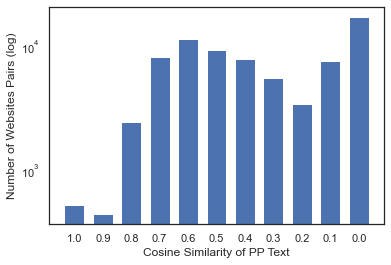

In [204]:
import matplotlib.pyplot as plt

plt.bar(sim['sim'], sim['web1'], width=0.7)
plt.yscale('log')
plt.ylabel("Number of Websites Pairs (log)")
plt.xlabel("Cosine Similarity of PP Text")
# Show graphic
plt.show()

In [211]:
# i added some dates manually so lets read excel
date = pd.read_excel(mypath+'.xlsx')

In [212]:
date

,Unnamed: 0,website,date,lang
0,0,105games.com,Not provided,en
1,1,absolutist.com,Not provided,en
2,2,addictinggames.com,2019-01-03 00:00:00,en
3,3,aelgame.com,Not provided,en
4,4,al3aby4yy.com,Not provided,en
...,...,...,...,...
380,380,www.zynga.com,Not provided,en
381,381,yaksgames.com,Not provided,en
382,382,yourgames.io,2021-01-01 00:00:00,en
383,383,zh.pog.com,Not provided,en


In [222]:
date[date['date']!='Not provided']

,Unnamed: 0,website,date,lang
2,2,addictinggames.com,2019-01-03 00:00:00,en
5,5,apkpure.com,2018-05-25 00:00:00,en
9,9,arcade.lemonde.fr,1/20/2020,en
10,10,armorgames.com,2018-01-31 00:00:00,en
25,25,en.forgeofempires.com,2019-06-25 00:00:00,en
...,...,...,...,...
351,351,www.speelspelletjes.nl,2022-05-09 00:00:00,en
357,357,www.spielyeti.ch,2018-12-17 00:00:00,en
361,361,www.topminigames.com,2013-05-03 00:00:00,en
363,363,www.trochoi.net,2018-12-17 00:00:00,en


In [214]:
date[date['lang']!='en']

,Unnamed: 0,website,date,lang
12,12,barbie-igri.flash-igri.com,Not provided,bg
17,17,charat.me,Not provided,ja
19,19,clavejuegos.com,Not provided,es
21,21,de.upjers.com,Not provided,de
28,28,es.gamigo.com,Not provided,es
...,...,...,...,...
359,359,www.spong.it,Not provided,it
362,362,www.tresenraya.com,Not provided,es
368,368,www.universodelgioco.it,Not provided,it
369,369,www.vgames.bg,Not provided,bg


In [226]:
date['lang'].drop_duplicates().reset_index(drop = True)

0     en
1     bg
2     ja
3     es
4     de
5     fr
6     ko
7     vi
8     it
9     uk
10    tr
11    pt
12    nl
13    ru
14    id
15    ar
16    pl
17    ro
Name: lang, dtype: object

In [235]:
d = date.groupby('lang', as_index = False)['website'].count()
d.rename(columns = {'website':'number of websites'}, inplace = True)


#### number of documents in other languages: 86 
#### a number of used languages: 18
#### number of pp that have a date of issuance: 89

In [303]:
inf = pd.DataFrame(columns = [' ','  '])
inf = inf.append({' ':'number of documents in other languages','  ':86}, ignore_index = True)
inf = inf.append({' ':'number of used languages','  ':18}, ignore_index = True)
inf = inf.append({' ':"number of pp that have a date of issuance",'  ':89}, ignore_index = True)
inf = inf.append({' ':"number of pairs of pps in different languages that are absolutely similar after translation",'  ':20}, ignore_index = True)

print( inf.to_latex(index=False))

\begin{tabular}{ll}
\toprule
                                                   \\
\midrule
            number of documents in other languages & 86 \\
                          number of used languages & 18 \\
         number of pp that have a date of issuance & 89 \\
number of pairs of pps in different languages t... & 20 \\
\bottomrule
\end{tabular}



In [237]:
print( d.to_latex(index=False))

\begin{tabular}{lr}
\toprule
lang &  number of websites \\
\midrule
  ar &                   2 \\
  bg &                   3 \\
  de &                   7 \\
  en &                 299 \\
  es &                  10 \\
  fr &                  12 \\
  id &                   2 \\
  it &                  13 \\
  ja &                   7 \\
  ko &                   1 \\
  nl &                   9 \\
  pl &                   4 \\
  pt &                   4 \\
  ro &                   2 \\
  ru &                   4 \\
  tr &                   4 \\
  uk &                   1 \\
  vi &                   1 \\
\bottomrule
\end{tabular}



In [289]:
sim_lang = simil_df.copy()
sim_lang = sim_lang.merge(date[['website','lang']], how='left', left_on='web1', right_on='website')

In [291]:
sim_lang.rename(columns = {'lang':'lang1'}, inplace = True)
sim_lang

,web1,web2,sim,website,lang1
0,105games.com,absolutist.com,0.4,105games.com,en
1,105games.com,addictinggames.com,0.3,105games.com,en
2,105games.com,aelgame.com,0.3,105games.com,en
3,105games.com,al3aby4yy.com,0.1,105games.com,en
4,105games.com,apkpure.com,0.3,105games.com,en
...,...,...,...,...,...
73914,yaksgames.com,zh.pog.com,0.6,yaksgames.com,en
73915,yaksgames.com,zh.y8.com,0.6,yaksgames.com,en
73916,yourgames.io,zh.pog.com,0.8,yourgames.io,en
73917,yourgames.io,zh.y8.com,0.8,yourgames.io,en


In [292]:
sim_lang = sim_lang.merge(date[['website','lang']], how='left', left_on='web2', right_on='website')
sim_lang.rename(columns = {'lang':'lang2'}, inplace = True)
sim_lang = sim_lang.drop(columns=['website_x', 'website_y'])


In [293]:
sim_lang

,web1,web2,sim,lang1,lang2
0,105games.com,absolutist.com,0.4,en,en
1,105games.com,addictinggames.com,0.3,en,en
2,105games.com,aelgame.com,0.3,en,en
3,105games.com,al3aby4yy.com,0.1,en,en
4,105games.com,apkpure.com,0.3,en,en
...,...,...,...,...,...
73914,yaksgames.com,zh.pog.com,0.6,en,en
73915,yaksgames.com,zh.y8.com,0.6,en,en
73916,yourgames.io,zh.pog.com,0.8,en,en
73917,yourgames.io,zh.y8.com,0.8,en,en


In [295]:
s = sim_lang.copy()
s['sim'] = s['sim'].apply(lambda x: float(x)) 
s = s[s['sim']>=1]
s[s['lang1'] != s['lang2']].reset_index(drop = True)

,web1,web2,sim,lang1,lang2
0,www.actiongame.com,www.giochisolitario.it,1.0,en,it
1,www.actiongame.com,www.juegos-mentales.com,1.0,en,es
2,www.actiongame.com,www.juegosmahjong.com,1.0,en,es
3,www.actiongame.com,www.tresenraya.com,1.0,en,es
4,www.giochisolitario.it,www.hiddenobjectgames.com,1.0,it,en
5,www.giochisolitario.it,www.juegos-mentales.com,1.0,it,es
6,www.giochisolitario.it,www.juegosmahjong.com,1.0,it,es
7,www.giochisolitario.it,www.mahjong.com,1.0,it,en
8,www.giochisolitario.it,www.mindgames.com,1.0,it,en
9,www.giochisolitario.it,www.tresenraya.com,1.0,it,es


In [4]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F
#https://huggingface.co/nsi319/legal-led-base-16384
model_name  = 'nsi319/legal-led-base-16384'

for n in f:
#     res = pd.DataFrame(columns = [' summary_text'])
    print(n)
    file = open(mypath + '/'+n,'r')
    classifier = pipeline('summarization',model = model_name)
    result = classifier(file.read())
    print(result)
#     res = res.append(result[0], ignore_index = True)
#     res.to_csv(n+'_st',index= False)

105games.com_privacypolicy
[{'summary_text': 'The Interactive Advertising Bureau today announced that it has issued an online privacy policy that guides how we'}]
absolutist.com_privacypolicy
[{'summary_text': 'The Interactive Advertising Bureau today announced that it has obtained a court order halting the sale, purchase'}]
addictinggames.com_privacypolicy


Token indices sequence length is longer than the specified maximum sequence length for this model (45997 > 16384). Running this sequence through the model will result in indexing errors


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:76] data. DefaultCPUAllocator: not enough memory: you tried to allocate 8493465600 bytes.